In [1]:
pip install opencv-python matplotlib numpy scikit-image


Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
print(os.path.exists(r"C:\Users\Karthik S\Documents\Infosys-Internship\circuitguard\dataset\PCBData"))


False


In [3]:
import os, glob, cv2
import numpy as np
import matplotlib.pyplot as plt


In [15]:
DATA_DIR = r"/home/karthik/projects/circuitguard/dataset/PCBData" 


In [5]:
groups = [d for d in os.listdir(DATA_DIR) if os.path.isdir(os.path.join(DATA_DIR, d))]
print("Total groups:", len(groups))
print("First few groups:", groups[:5])


Total groups: 11
First few groups: ['group12000', 'group90100', 'group44000', 'group12100', 'group92000']


In [18]:
group = os.path.join(DATA_DIR, groups[0])   
print("Using group:", group)

template_path = glob.glob(os.path.join(group, "*", "*.jpg"))[0]
test_path     = glob.glob(os.path.join(group, "*not", "*.jpg"))[0]

print("Template:", template_path)
print("Test:", test_path)

template = cv2.imread(template_path, 0)
test     = cv2.imread(test_path, 0)


Using group: /home/karthik/projects/circuitguard/dataset/PCBData/group12000


IndexError: list index out of range

In [17]:
test_resized = cv2.resize(test, (template.shape[1], template.shape[0]))
diff = cv2.absdiff(template, test_resized)


NameError: name 'test' is not defined

In [13]:
_, mask = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)


NameError: name 'diff' is not defined

NameError: name 'template' is not defined

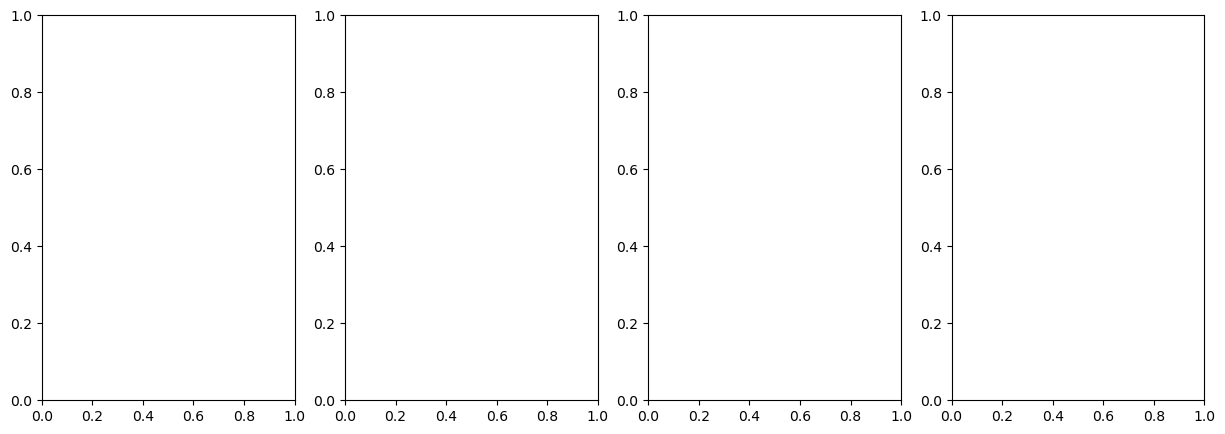

In [14]:
fig, axs = plt.subplots(1,4, figsize=(15,5))
axs[0].imshow(template, cmap='gray'); axs[0].set_title("Template"); axs[0].axis("off")
axs[1].imshow(test, cmap='gray'); axs[1].set_title("Test"); axs[1].axis("off")
axs[2].imshow(diff, cmap='gray'); axs[2].set_title("Difference"); axs[2].axis("off")
axs[3].imshow(mask, cmap='gray'); axs[3].set_title("Defect Mask"); axs[3].axis("off")
plt.show()
